# BATTLESHIP

In [1]:
import numpy as np
from random import randint
from random import shuffle

#################            Top Down Design Version            #################

def showboard(board):
    """Prints the board neatly formatted.
    Input is an array that represents the board."""
    
    size = len(board)
    length = np.arange(1,size+1)
    print("\n", *length[:], sep = '   ')
    print("----"*size)
    for i in range(size):
        print(chr(65+i), *board[:,i])

        
def usership(placement, board):
    """Places a ship on the user's board.
    Input is the ship's placement and the board array."""
    
    if placement[-1] == 0:
        shipcolumn = 9
    else:
        shipcolumn = int(placement[-1])-1
    shiprow = ord(placement[0].lower())-97
    board[shipcolumn, shiprow] = ' o '

    
def pcship(board):
    """Places a ship on the computer's board.
    Input is the board array."""
    
    size = len(board) 
    shipcolumn = randint(0, size-1)
    shiprow = randint(0, size-1)
    if board[shipcolumn, shiprow] != ' o ':
        board[shipcolumn, shiprow] = ' o '
    else:
        shiprow = randint(0, size-1)
        shipcolumn = randint(0, size-1) 
        if board[shipcolumn, shiprow] != ' o ':
            board[shipcolumn, shiprow] = ' o '
    
    
def remaining_ships(board):
    """Returns the amount of ships left on the board.
    Input is the board array for which to count ships."""
    
    count = 0
    boardlist = board.tolist()
    for row in boardlist:
        for j in row:
            if j == ' o ':
                count = count + 1
    return count


def player_turn(board2, enemyboard):
    """Prompts the player to take their turn.
    Input is the computer's board and a board for the user to visualize their shots."""
    
    placement = input("\nEnter the placement of your target square to fire on enemy ships. ")
    shipcolumn = int(placement[-1])-1
    shiprow = ord(placement[0].lower())-97
    enemyboard[shipcolumn, shiprow] = ' x '
    showboard(enemyboard)
    if board2[shipcolumn, shiprow] == ' o ':
        print("Hooray! You hit a ship!")
    else:
        print("\nWhoops! Looks like you didn't hit anything :/")
    board2[shipcolumn, shiprow] = ' x '
    enemyboard[shipcolumn, shiprow] = ' x '
    print("There are ", remaining_ships(board2), " ships left on the enemy's board.")
    
    
def create_guess_list(size):
    """Creates a list of ship placements from which the computer can make guesses."""
    guessing_list = []
    for i in range(size):
        term = str(i)
        for j in range(size):
            term = term[0]+str(j)
            guessing_list.append(term)
                
    return guessing_list


def computer_turneasy(board):
    """Executes the computer's turn. 
    Input is the user's board, which the function then returns."""
    
    size = len(board)
    shipcolumn = randint(0, size-1)
    shiprow = randint(0, size-1)
    if board[shipcolumn, shiprow] == ' o ':
        print("Uh oh! The enemy hit your ship at ",chr(65+shipcolumn), shiprow+1, ".", sep = '')
        board[shipcolumn, shiprow] = ' x '
    else:
        print("\nPhew! The enemy didn't hit any ships.")
    board[shipcolumn, shiprow] = ' x '
    return board


def computer_turnhard(board, guessing_list):
    """Executes the computer's turn.
    Input and return is the user's board and a list from which the computer can make guesses."""
    
    placement1 = guessing_list.pop(0)
    shipcolumn = int(placement1[0])
    shiprow = int(placement1[-1])
    if board[shipcolumn, shiprow] == ' o ':
        print("Uh oh! The enemy hit your ship at ",chr(65+shipcolumn), shiprow+1, ".", sep = '')
        board[shipcolumn, shiprow] = ' x '
    else:
        print("\nPhew! The enemy didn't hit any ships.")
    return board, guessing_list

def user_vs_pc():
    """The game's main function for user playing against computer."""
    level = input("To begin, type easy, medium, or hard to choose your level of difficulty.")
    size = int(input("Great! Next, choose the side length of your board (input an integer between 4 and 10.) "))

    board1 = np.array([' - ']*size**2).reshape(size, size)
    board2 = np.array([' - ']*size**2).reshape(size, size)
    enemyboard = np.array([' - ']*size**2).reshape(size, size) ## a board for the player to visualize their shots
    guessing_list = create_guess_list(size)

    showboard(board1)

    print("\nNext, input where you want to place your ship. For example, input A1 for the top left corner.")
    print("Your ship is represented by an 'o'.")
    placement = input()

    usership(placement, board1)
    pcship(board2)
    showboard(board1)

    question = input("Do you want to input another ship? If yes, type ship placement. If not, hit enter. ")
    while question != '':
        usership(question, board1)
        pcship(board2)
        showboard(board1)
        question = input("Do you want to input another ship? If yes, type ship placement. If not, hit enter. ")

    print("\nTime to start firing on enemy ships! Here is an empty board for you to fire on.")
    showboard(enemyboard)

    while remaining_ships(board1) != 0 and remaining_ships(board2) != 0:
        player_turn(board2, enemyboard)
        if remaining_ships(board1) != 0 and remaining_ships(board2) != 0:
            print("\nNow it's the computer's turn! Here's what happened:")
            if level[0].lower() == 'e':
                board1 = computer_turneasy(board1)
            elif level[0].lower() == 'm':
                board1, guessing_list = computer_turnhard(board1, guessing_list)
            else:
                shuffle(guessing_list)
                board1, guessing_list = computer_turnhard(board1, guessing_list)
            print("You have ", remaining_ships(board1), " ships left unharmed.")
            if remaining_ships(board1) == 0:
                print("\nUh oh! You lost :( Better luck next time!")
        else:
            print("\nCongratulations! You won the game :)")
            
            
def pc_vs_pc():
    """The game's main function for computer simulations."""
    
    reps = int(input("\nHow many games would you like to simulate? "))
    size = int(input("How big do you want the side length of your board to be? Input an integer between 5 and 10. "))
    shipnum = int(input("How many ships would you like to place on your board? "))

    board1 = np.array([' - ']*size**2).reshape(size, size)
    board2 = np.array([' - ']*size**2).reshape(size, size)
    win1 = win2 = 0

    for i in range(reps):
    
        guessing_list1 = create_guess_list(size)   
        guessing_list2 = guessing_list1.copy()

        shuffle(guessing_list1)
        #shuffle(guessing_list2)
        #print(guessing_list1, guessing_list2)
        
        for i in range(shipnum):
            pcship(board1)
            pcship(board2)

        while remaining_ships(board1) != 0 and remaining_ships(board2) != 0:
            #computer 1 is guessing on computer 2's board
            placement1 = guessing_list1.pop(0)
            shipcolumn1 = int(placement1[0])
            shiprow1 = int(placement1[-1])
            board2[shipcolumn1, shiprow1] = ' x '
        
            #computer 2 is guessing on computer 1's board
            placement2 = guessing_list2.pop(0)
            shipcolumn2 = int(placement2[0])
            shiprow2 = int(placement2[-1])
            #shipcolumn2 = randint(0, size-1)
            #shiprow2 = randint(0, size-1)
            board1[shipcolumn2, shiprow2] = ' x '
        
        if remaining_ships(board1) != 0:
            win1 = win1 + 1
        else:
            win2 = win2 + 1
        
    print("\nComputer 1 won ", win1, " times (", "%4.2f"%(100*win1/reps), "% of the time).", sep = '')
    print("Computer 2 won ", win2, " times (", "%4.2f"%(100*win2/reps), "% of the time).", sep = '')
    
    
            
### calling the main functions!! asks the user to choose between playing or viewing simulations. ###

try:
    print("Welcome to Battleship!")
    print("Choose between playing against the computer, or simulating many automated games. ")
    answer = input("\nType 'yes' to play or 'no' to simulate the games. ")
    if answer[0].lower() == 'y':
        user_vs_pc()
    else:
        pc_vs_pc()
except ValueError:
    print("\nWhoops! Looks like your entry wasn't in the right format- please restart the game and try again.")

Welcome to Battleship!
Choose between playing against the computer, or simulating many automated games. 

Type 'yes' to play or 'no' to simulate the games. yes
To begin, type easy, medium, or hard to choose your level of difficulty.medium
Great! Next, choose the side length of your board (input an integer between 4 and 10.) 6

   1   2   3   4   5   6
------------------------
A  -   -   -   -   -   - 
B  -   -   -   -   -   - 
C  -   -   -   -   -   - 
D  -   -   -   -   -   - 
E  -   -   -   -   -   - 
F  -   -   -   -   -   - 

Next, input where you want to place your ship. For example, input A1 for the top left corner.
Your ship is represented by an 'o'.
a2

   1   2   3   4   5   6
------------------------
A  -   o   -   -   -   - 
B  -   -   -   -   -   - 
C  -   -   -   -   -   - 
D  -   -   -   -   -   - 
E  -   -   -   -   -   - 
F  -   -   -   -   -   - 
Do you want to input another ship? If yes, type ship placement. If not, hit enter. c4

   1   2   3   4   5   6
------------

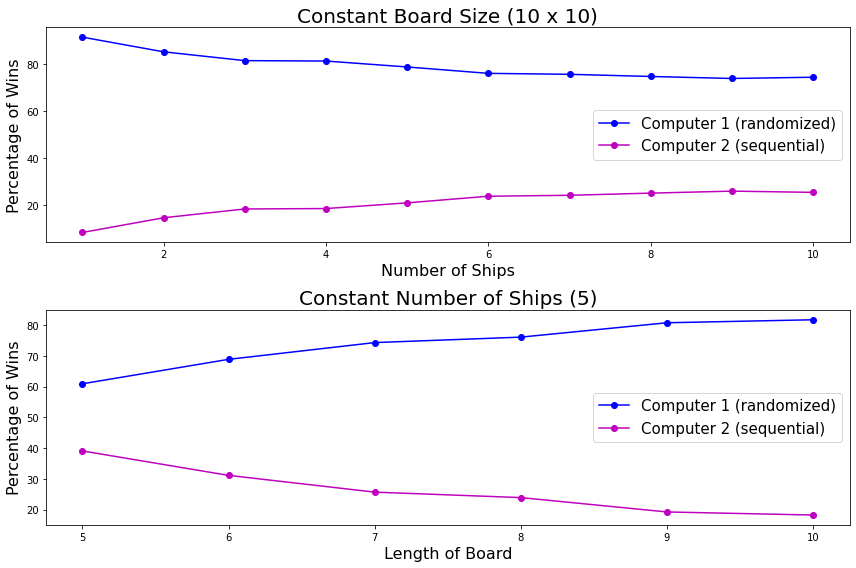

In [2]:
import matplotlib.pyplot as plt

## both graphs have a constant of 1000 games simulated

shipnum = [*range(1,11)]
wins1a = [91.6, 85.35, 81.6, 81.425, 78.9, 76.175, 75.775, 74.85, 74.0, 74.525]
wins2a = [8.4, 14.65, 18.4, 18.575, 21.0, 23.825, 24.225, 25.15, 26.0, 25.475]

boardsize = [*range(5,11)]
wins1b = [60.925, 68.875, 74.325, 76.1, 80.775, 81.75]
wins2b = [39.075, 31.125, 25.675, 23.9, 19.225, 18.225]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

axes[0].plot(shipnum, wins1a, 'b', label = 'Computer 1 (randomized)', marker = 'o')
axes[0].plot(shipnum, wins2a, 'm', label = 'Computer 2 (sequential)', marker = 'o')
axes[0].legend(fontsize = 15)
axes[0].set_title("Constant Board Size (10 x 10)", fontsize = 20)
axes[0].set_xlabel("Number of Ships", fontsize = 16)
axes[0].set_ylabel("Percentage of Wins", fontsize = 16)

axes[1].plot(boardsize, wins1b, 'b', label = 'Computer 1 (randomized)', marker = 'o')
axes[1].plot(boardsize, wins2b, 'm', label = 'Computer 2 (sequential)', marker = 'o')
axes[1].legend(fontsize = 15)
axes[1].set_title("Constant Number of Ships (5)", fontsize = 20)
axes[1].set_xlabel("Length of Board", fontsize = 16)
axes[1].set_ylabel("Percentage of Wins", fontsize = 16)

plt.tight_layout()
plt.show()